In [106]:
import numpy as np

from keras.preprocessing.image import ImageDataGenerator


In [107]:
# Setting up parameters
path = 'myData'  # Path to image data
labelFile = 'labels/labels.csv'  # File containing class labels



In [108]:
import os

total_samples = sum([len(files) for r, d, files in os.walk(path)])
total_samples

34799

In [109]:
batch_size_val = 64
epochs_val = 100
imageDimesions = (32, 32, 3)
testRatio = 0.2  # Split ratio for test set
validationRatio = 0.2  # Split ratio for validation set

In [110]:
train_samples = int(total_samples * (1 - testRatio - validationRatio))
steps_per_epoch_val = train_samples // batch_size_val
steps_per_epoch_val

326

In [111]:
train_samples

20879

In [112]:
validation_samples = int(total_samples * validationRatio)
validation_steps = validation_samples // batch_size_val
validation_steps

108

In [113]:
path = 'myData'  # Path to the dataset directory

# Initialize lists to store images and their class labels
images = []
classNo = []

In [114]:
def numerical_sort(value):
    return int(value) if value.isdigit() else value

# List and sort class folders numerically
class_folders = sorted([folder for folder in os.listdir(path) if os.path.isdir(os.path.join(path, folder))], key=numerical_sort)

print("Numerically Sorted Class Folders:", class_folders)
noOfClasses = len(class_folders)



Numerically Sorted Class Folders: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42']


In [115]:
import cv2
for class_id, folder_name in enumerate(class_folders):
    folder_path = os.path.join(path, folder_name)
    if not os.path.isdir(folder_path):
        continue
    image_files = os.listdir(folder_path)
    for image_file in image_files:
        img_path = os.path.join(folder_path, image_file)
        curImg = cv2.imread(img_path)
        if curImg is not None:
            images.append(curImg)
            classNo.append(class_id)


In [116]:
for image_file in image_files:
        img_path = os.path.join(folder_path, image_file)

        # Read the image
        curImg = cv2.imread(img_path)

        # Check if the image was correctly read
        if curImg is not None:
            images.append(curImg)
            classNo.append(class_id)

# Convert images and classNo lists to numpy arrays if needed


In [117]:
class_id

42

In [118]:
images = np.array(images)
classNo = np.array(classNo)
# Convert lists to numpy arrays for further processing


In [119]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, classNo, test_size=testRatio)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validationRatio)
# Splitting data into training, validation, and test sets


In [120]:
# Ensuring data consistency
if X_train.shape[0] != y_train.shape[0]:
    print("Mismatch in number of images and labels in the training set.")
if X_validation.shape[0] != y_validation.shape[0]:
    print("Mismatch in number of images and labels in the validation set.")
if X_test.shape[0] != y_test.shape[0]:
    print("Mismatch in number of images and labels in the test set.")

if X_train.shape[1:] != imageDimesions:
    print("Incorrect image dimensions in the training set.")
if X_validation.shape[1:] != imageDimesions:
    print("Incorrect image dimensions in the validation set.")
if X_test.shape[1:] != imageDimesions:
    print("Incorrect image dimensions in the test set.")


In [121]:
import pandas as pd

data = pd.read_csv(labelFile)

print("Data shape: ", data.shape, type(data))
# Reading class labels 


Data shape:  (43, 2) <class 'pandas.core.frame.DataFrame'>


In [122]:
data

,ClassId,Name
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)
5,5,Speed limit (80km/h)
6,6,End of speed limit (80km/h)
7,7,Speed limit (100km/h)
8,8,Speed limit (120km/h)
9,9,No passing


In [123]:

num_classes = data['Name'].nunique()  # Replace 'label_column_name' with the actual column name
print("Number of classes:", num_classes)


Number of classes: 43


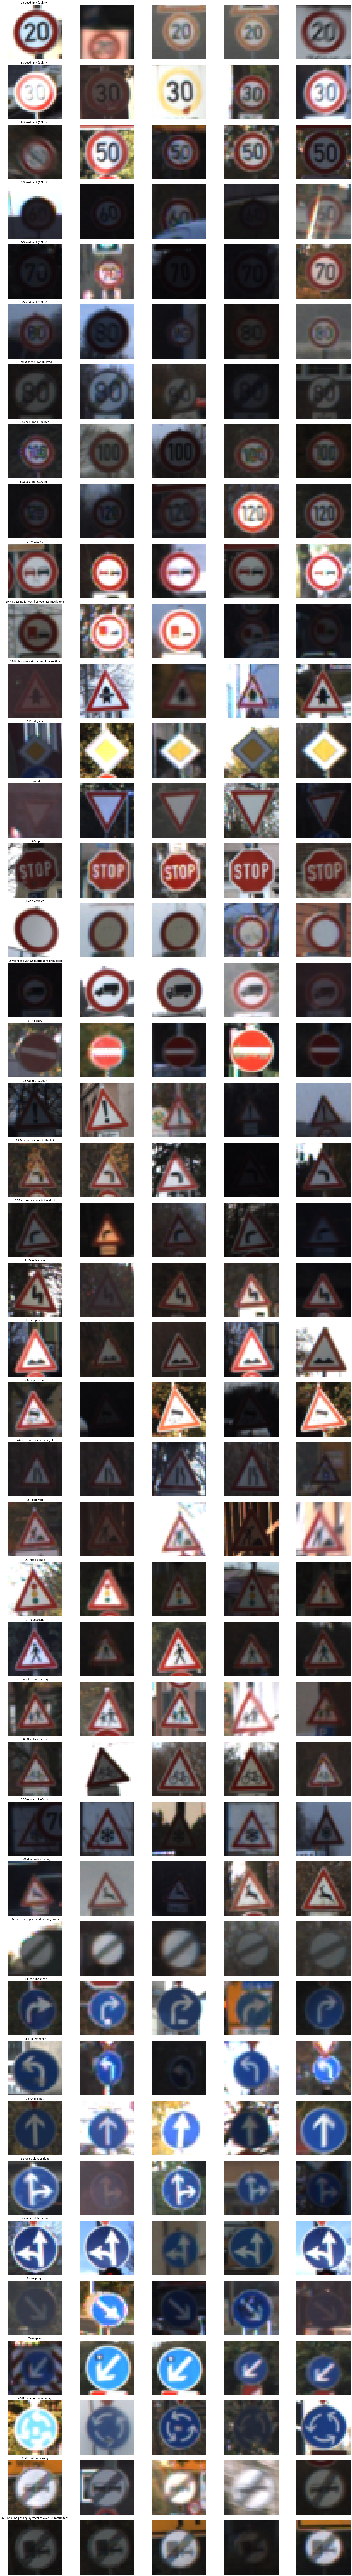

In [124]:
# Displaying sample images of each class

import matplotlib.pyplot as plt

# Number of columns for the subplot (number of sample images per class)
# Number of images to display per class
cols = 5

# Creating a figure with subplots
fig, axs = plt.subplots(nrows=noOfClasses, ncols=cols, figsize=(5 * cols, 4 * noOfClasses))

# Loop through each class
for class_id in range(noOfClasses):
    # Get the first 'cols' number of images of the current class
    class_images = X_train[y_train == class_id][:cols]

    # Displaying images for each class
    for col in range(cols):
        if col < len(class_images):
            image = class_images[col]
            axs[class_id, col].imshow(image, cmap=plt.get_cmap("gray"))  # Adjust cmap if images are not grayscale
            axs[class_id, col].axis("off")
            if col == 0:  # Label the first image of each row with the class name
                if not data[data['ClassId'] == class_id].empty:
                    class_name = data.loc[data['ClassId'] == class_id, 'Name'].values[0]
                    axs[class_id, col].set_title(f"{class_id}-{class_name}")
                else:
                    axs[class_id, col].set_title(f"Class ID {class_id}")

# Adjust layout for better visual presentation
plt.tight_layout()
plt.show()


In [125]:
noOfClasses

43

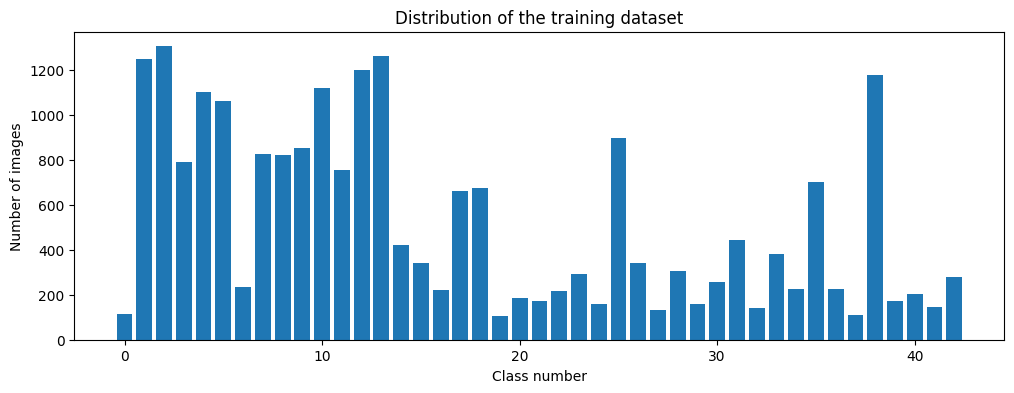

In [126]:
# Assuming you have a list 'y_train' with class labels for each sample in your training set

num_of_samples = []

# Count the number of samples for each class
for class_id in range(noOfClasses):
    num_of_samples.append(np.sum(y_train == class_id))

# Now plot the bar chart
plt.figure(figsize=(12, 4))
plt.bar(range(0, noOfClasses), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()


In [127]:
# Image augmentation
dataGen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, zoom_range=0.2, shear_range=0.1, rotation_range=10)
dataGen.fit(X_train)

In [128]:
#import numpy as np

# Assuming X_train, X_validation, X_test are your original datasets

# Function to preprocess images in a dataset
def preprocess_images(image_set):
    processed_set = []
    for img in image_set:
        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
        eq_img = cv2.equalizeHist(gray_img)               # Equalize histogram
        norm_img = eq_img / 255                           # Normalize pixel values
        processed_set.append(norm_img)
    return np.array(processed_set).reshape(-1, gray_img.shape[0], gray_img.shape[1], 1)



In [129]:
# Applying preprocessing to all datasets
X_train = preprocess_images(X_train)
X_validation = preprocess_images(X_validation)
X_test = preprocess_images(X_test)


In [130]:
# Reshaping images to add depth of 1
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_validation = X_validation.reshape(X_validation.shape[0], X_validation.shape[1], X_validation.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)


In [131]:
# Image augmentation
dataGen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, zoom_range=0.2, shear_range=0.1, rotation_range=10)
dataGen.fit(X_train)
batches = dataGen.flow(X_train, y_train, batch_size=20)
X_batch, y_batch = next(batches)

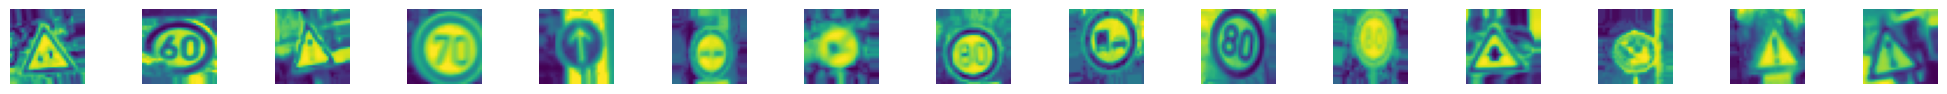

In [132]:
# Displaying augmented image samples to reduce over fitting
fig, axs = plt.subplots(1, 15, figsize=(20, 5))
fig.tight_layout()
for i in range(15):
    axs[i].imshow(X_batch[i].reshape(imageDimesions[0], imageDimesions[1]))
    axs[i].axis('off')
plt.show()


In [133]:
#!pip install --upgrade tensorflow
#!pip install --upgrade keras


In [134]:
# Converting labels to categorical
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=noOfClasses)
y_validation = to_categorical(y_validation, num_classes=noOfClasses)
y_test = to_categorical(y_test, num_classes=noOfClasses)



In [135]:
y_validation

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [136]:
#Building our own model to detect traffic signs

from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from keras.optimizers import Adam

# Parameters for the CNN model
no_Of_Filters = 60
size_of_Filter = (5, 5)
size_of_Filter2 = (3, 3)
size_of_pool = (2, 2)
no_Of_Nodes = 500

# Adding Layers to the Sequential CNN
model = Sequential()
model.add(Conv2D(no_Of_Filters, size_of_Filter, input_shape=(imageDimesions[0], imageDimesions[1], 1), activation='relu'))
model.add(Conv2D(no_Of_Filters, size_of_Filter, activation='relu'))
model.add(MaxPooling2D(pool_size=size_of_pool))
model.add(Conv2D(no_Of_Filters // 2, size_of_Filter2, activation='relu'))
model.add(Conv2D(no_Of_Filters // 2, size_of_Filter2, activation='relu'))
model.add(MaxPooling2D(pool_size=size_of_pool))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(no_Of_Nodes, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(noOfClasses, activation='softmax'))

# Compiling the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])


In [137]:

from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier 
# Printing the model summary
model.summary()

history = model.fit(
    dataGen.flow(X_train, y_train, batch_size=batch_size_val),
    steps_per_epoch=steps_per_epoch_val,
    epochs=epochs_val,
    validation_data=(X_validation, y_validation),
    shuffle=True
)



Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 28, 28, 60)        1560      
                                                                 
 conv2d_21 (Conv2D)          (None, 24, 24, 60)        90060     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 12, 12, 60)        0         
 ng2D)                                                           
                                                                 
 conv2d_22 (Conv2D)          (None, 10, 10, 30)        16230     
                                                                 
 conv2d_23 (Conv2D)          (None, 8, 8, 30)          8130      
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 4, 4, 30)          0         
 ng2D)                                                

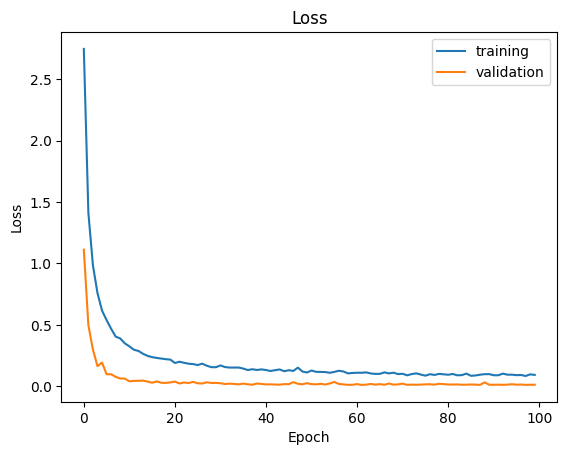

In [138]:

# Plotting training results
plt.figure(1)
plt.plot(history.history['loss'], label='training')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

# Displaying the plot
plt.show()


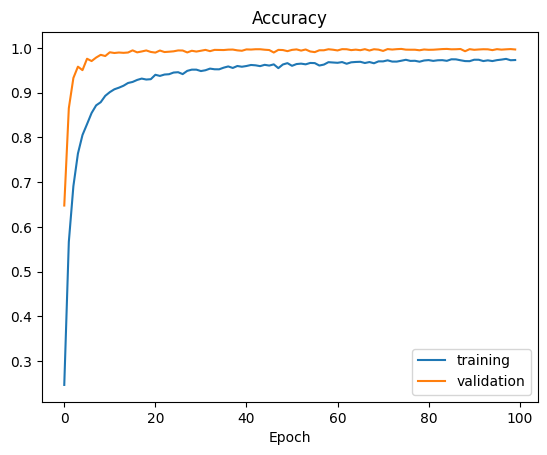

In [139]:
plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'])
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.show()

In [140]:
# Evaluating the model
score = model.evaluate(X_test, y_test, verbose=0)


In [141]:
print('Test Score:', score[0])
print('Test Accuracy:', score[1])

Test Score: 0.016983242705464363
Test Accuracy: 0.995144248008728


In [142]:
# Saving the model
import pickle
pickle_out = open("TrafficSignDetectorModel.p", "wb")
pickle.dump(model, pickle_out)
pickle_out.close()


INFO:tensorflow:Assets written to: C:\Users\SEDEMK~1\AppData\Local\Temp\tmprzq_n209\assets


INFO:tensorflow:Assets written to: C:\Users\SEDEMK~1\AppData\Local\Temp\tmprzq_n209\assets
